In [1]:
# cifar10数据集包含飞机、汽车、鸟、猫、鹿、狗、青蛙、马、船、卡车共10个类别

In [2]:
import tensorflow as tf
from tensorflow.keras import layers
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 加载数据集
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [4]:
# 查看图片数量和大小。因为这里的图像已经是彩色图像了，因此第四维的值为3
print(len(x_train))
print(len(x_test))
print(x_train.shape)

50000
10000
(50000, 32, 32, 3)


In [5]:
# 查看图片单个点信息。因为是彩色图片，所以单个点的信息包含R、G、B三个颜色通道的值
# 第一个[0]代表取50000张图片中的第一张，第二个[0]代表取第一行，第三个[0]代表取第一列
x_train[0][0][0] 

array([59, 62, 63], dtype=uint8)

In [6]:
# 定义数字对应类别的字典，因为我们训练时的标签是0-9，要映射成对应的类别名称显示
label_dict = {0:'airplane',1:'automobile',2:'bird',3:'cat',4:'deer',5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'}

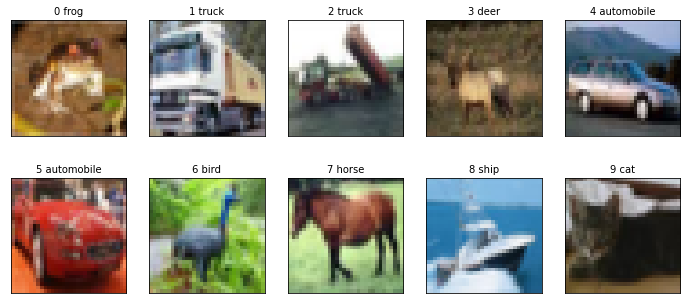

In [7]:
# 定义显示图片函数并显示图片，该函数和第一节大体一样，有小部分需要修改一下
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25: 
        num = 25
    for i in range(0, num):
        ax = plt.subplot(5, 5, i + 1)
        ax.imshow(images[idx], cmap='binary') 
        title= str(i) + ' ' + label_dict[labels[i][0]]  # 显示数字对应的类别
        if len(prediction) > 0:
            title += '=>' + label_dict[prediction[i]]  # 显示数字对应的类别
        ax.set_title(title,fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
        idx += 1
    plt.show()

plot_images_labels_prediction(x_train, y_train, [], 0)

In [8]:
# 数据标准化并查看一个点的值
x_train_normalize = x_train.astype('float32') / 255
x_test_normalize = x_test.astype('float32') / 255
print(x_train_normalize[0][0][0])

[0.23137255 0.24313726 0.24705882]


In [9]:
# 对标签进行One-Hot（独热编码）
y_train_OneHot = tf.keras.utils.to_categorical(y_train)
y_test_OneHot = tf.keras.utils.to_categorical(y_test)

In [10]:
# 模型搭建，这里搭建3层卷积神经网络提取特征
model = tf.keras.models.Sequential()
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',input_shape=(32,32,3),activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.3))
model.add(layers.Dense(2500, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1500, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(10, activation='softmax'))

In [11]:
# 模型参数设置
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
# 模型训练
train_history = model.fit(x_train_normalize, y_train_OneHot, validation_split=0.2, epochs=5, batch_size=128, verbose=1)

Epoch 1/5
313/313 [==============================] - 208s 663ms/step - loss: 1.8398 - accuracy: 0.3113 - val_loss: 1.9757 - val_accuracy: 0.3216
Epoch 2/5
313/313 [==============================] - 180s 577ms/step - loss: 1.4093 - accuracy: 0.4825 - val_loss: 1.3845 - val_accuracy: 0.5080
Epoch 3/5
313/313 [==============================] - 179s 572ms/step - loss: 1.1898 - accuracy: 0.5705 - val_loss: 1.1076 - val_accuracy: 0.6080
Epoch 4/5
313/313 [==============================] - 179s 571ms/step - loss: 1.0532 - accuracy: 0.6255 - val_loss: 1.0587 - val_accuracy: 0.6258
Epoch 5/5
313/313 [==============================] - 179s 573ms/step - loss: 0.9476 - accuracy: 0.6643 - val_loss: 0.8966 - val_accuracy: 0.6815


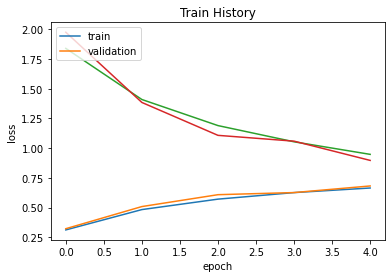

In [13]:
# 定义曲线显示函数并显示
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.xlabel('epoch')
    plt.ylabel(train)
    plt.legend(['train','validation'],loc='upper left')

show_train_history(train_history, 'accuracy', 'val_accuracy')
show_train_history(train_history, 'loss', 'val_loss')

In [14]:
# 测试机进行测试
scores = model.evaluate(x_test_normalize, y_test_OneHot, verbose=2)
print(scores[1])

313/313 - 11s - loss: 0.9006 - accuracy: 0.6785
0.6784999966621399


In [15]:
# 模型预测
prediction = model.predict_classes(x_test_normalize)
print(prediction)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[3 8 8 ... 5 1 7]


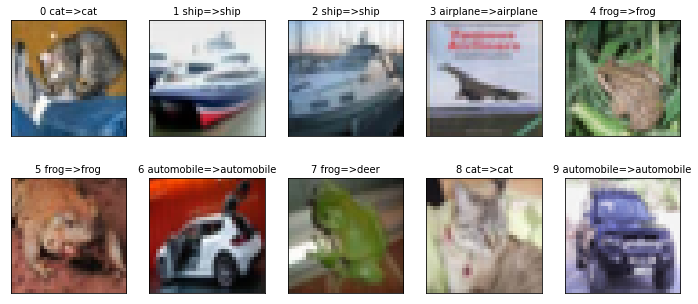

In [16]:
# 调用之前定义的plot_images_labels_prediction函数查看具体图片信息和结果
plot_images_labels_prediction(x_test, y_test, prediction, 0, 10)

In [17]:
# keras的model.predict_classes是用于直接预测出类别结果，
# 如果我们想知道预测图片分别对应10个类别的概率，我们可以用model.predict来进行查看
prediction_probability = model.predict(x_test_normalize)
print(prediction_probability[0])

[0.00104498 0.00142254 0.0065442  0.8444942  0.00554028 0.10688003
 0.01496903 0.00609455 0.01192717 0.00108293]


In [18]:
# 我们可以定义一个展示图片 + 预测概率的函数，方便查看预测概率结果
def show_predicted_probability(x, y, prediction, prediction_probability, i):
    print("label:", label_dict[y[i][0]], 'predict,', label_dict[prediction[i]])
    plt.figure(figsize=(2, 2))
    plt.imshow(x[i])
    plt.show()
    for j in range(10):  # 输出10个类别概率
        print(label_dict[j] + 'Probability:%1.9f' % (prediction_probability[i][j]))

In [19]:
# 模型的保存
model.save_weights("cifar.h5")

In [20]:
# 如果要加载一个已经训练好的模型的参数，则用load_weights进行读取
model.load_weights("cifar.h5")